In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3
import pandas as pd
import numpy as np
import seaborn as sns

import random
import time

%matplotlib inline

In [2]:
data = pd.read_csv('./data/apples_pears.csv')

In [3]:
pears = data['target'] == 1
apples = data['target'] == 0
data.head()

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


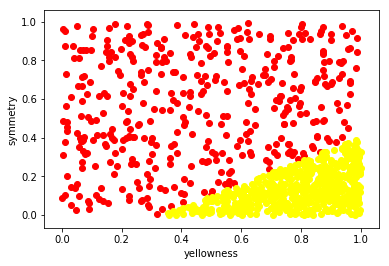

In [4]:
plt.scatter(data[apples].yellowness, data[apples].symmetry, color='red')
plt.scatter(data[pears].yellowness, data[pears].symmetry, color='yellow')
plt.xlabel('yellowness')
plt.ylabel('symmetry')
plt.show()

In [5]:
class Perceptron:
    def __init__(self, w):
        self.w = w
        
    def _activate(self, x):
        """ Пороговая активационная функция
        """
        if np.dot(x, self.w.T) > 0:
            return 1
        else:
            return 0
    
    def forward_pass(self, input_matrix):
        """
        :param: input_matrix: матрица примеров размера (n,m)
        :return: вектор (n, 1) с ответами
        """
        v = np.vectorize(self._activate, signature='(n)->()')
        return v(input_matrix)

In [6]:
w = np.array([[-1, 511]])
input_matrix = np.array([[0,0], [0, 1], [1, 0], [1, 1]])

In [7]:
per = Perceptron(w)

In [8]:
per.forward_pass(input_matrix).reshape(-1, 1)

array([[0],
       [1],
       [0],
       [1]])

In [9]:
f = lambda x: x**3 - 2*x**2 + 2

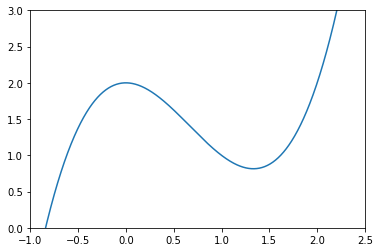

In [10]:
x = np.linspace(-1, 2.5, 1000)
plt.plot(x, f(x))
plt.xlim([-1, 2.5])
plt.ylim([0,3])
plt.show()

In [11]:
def f_prime(x):
    return 3*x**2 - 4*x

In [12]:
x_old = 0
x_new = 2
lr = 0.1
precision = 0.001

x_history, y_history = [x_new], [f(x_new)]
while abs(x_new - x_old) > precision:
    x_old = x_new
    grad = f_prime(x_new)
    x_new = x_old - lr*grad
    x_history.append(x_new)
    y_history.append(f(x_new))
print("Предполагаемый минимум", x_new)

Предполагаемый минимум 1.3345183032556167


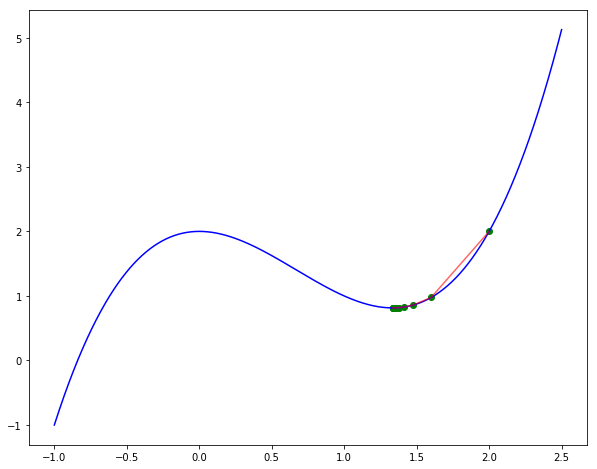

In [17]:
plt.figure(figsize=[10, 8])
plt.plot(x, f(x), c='b')
plt.plot(x_history, y_history, c='r', alpha=0.6)
plt.scatter(x_history, y_history, c ='g')
plt.show()

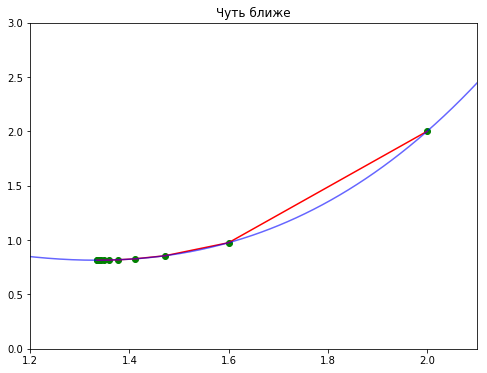

In [23]:
plt.figure(figsize=[8,6])
plt.scatter(x_history, y_history, c='g')
plt.plot(x_history, y_history, c='r')
plt.plot(x, f(x), c='b', alpha=0.6)
plt.xlim([1.2, 2.1])
plt.ylim([0,3])
plt.title('Чуть ближе')
plt.show()

In [138]:
class Perceptron:
    def __init__(self, w, bias):
        self._w = np.array(w, dtype='float64')
        self._T = bias
    def _activate(self, x):
        """ Активационная функция
        """
        treshold = lambda x: 1 if x > 0 else 0
        v = np.vectorize(treshold)
        return v(x)
    
    def forward_pass(self, input_matrix):
        """
        :param: input_matrix: матрица примеров размера (n,m)
        :return: вектор (n, 1) с ответами
        """
        net = np.dot(input_matrix, self._w) - self._T
        return self._activate(net)
    
    def grad_step(self, example, y, alpha):
        """ Обновляет значения весов на каждом объекте
        по отдельности
        """    
        diff = (self.forward_pass(example) - y)[0,0]
        if diff == 0:
            return 0
        upd_w = diff * example.T
        upd_T = diff
        self._w -= alpha*upd_w
        self._T += alpha*upd_T
        return 1
    
    def fit(self, input_martix, y, max_iter=1e8, alpha=0.001):
        i = 0
        errors = 1
        while errors and i < max_iter:
            i += 1
            errors = 0
            for example, answer in zip(input_matrix, y):
                errors += self.grad_step(example, answer, alpha)
                
                

In [139]:
def plot_line(coefs):
    w, bias = coefs
    a, b = - w[0][0] / w[1][0], - bas / w[1][0]
    xx = np.linspace(*plt.xlim())
    line.set_data(xx, a*xx + b)

In [140]:
W = np.random.rand(2,4)
perceptron_for_weights_line = Perceptron(W, 2)

In [144]:
def step_by_step_errors(p, input_matrix, y, max_steps=1e6):
    """
    обучает перцептрон последовательно на каждой строчке входных данных, 
    на каждом шаге обучения запоминает количество неправильно классифицированных примеров
    """
    def count_errors():
        return np.abs(p.forward_pass(input_matrix).astype(np.int) - y[:, None]).mean()
    errors_list = [count_errors()]
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((1,example.size))
            error = p.grad_step(example, answer,alpha=1)
            errors += error
            errors_list.append(count_errors())
    return errors_list



In [145]:
data.head()

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


Text(0.5,0,'Steps')

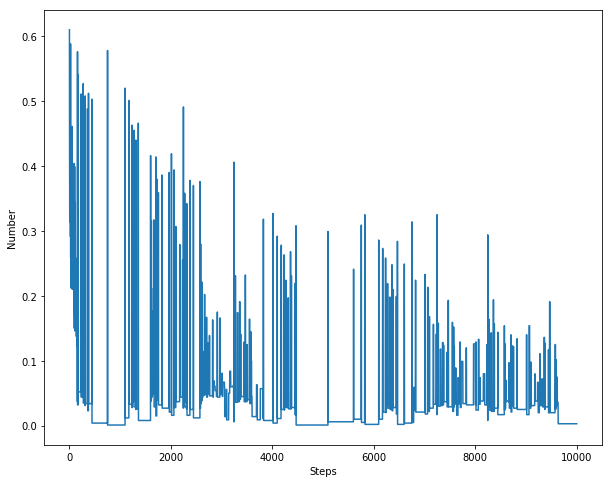

In [146]:
target = data['target']
W = np.random.random((2,1))
plt.figure(figsize=[10, 8])
perceptron_for_misclassification = Perceptron(W, 1)
errors_list = step_by_step_errors(perceptron_for_misclassification, \
                                  input_matrix=data.iloc[:,:2].values, y=target.values, max_steps=10)
plt.plot(errors_list)
plt.ylabel("Number")
plt.xlabel("Steps")